# Project Title: Bedah Statistik Deskriptif Penyakit Leukemia

## Goal

---

- Karakteristik Demografi Pasien:
    - Distribusi umur pasien leukemia di dataset ini? Umur berapa yang paling umum? Berapa rentang umurnya?
    - Berapa perbandingan jumlah pasien laki-laki dan perempuan? Apakah ada perbedaan signifikan?
    - Dari negara mana saja pasien leukemia ini berasal? Negara mana yang paling banyak menyumbang pasien di data ini?
    - Etnis apa saja yang terwakili di data pasien leukemia ini? Etnis mana yang paling dominan?

- Karakteristik Klinis Pasien:
    - Bagaimana distribusi nilai jumlah sel darah putih (WBC_Count), sel darah merah (RBC_Count), platelet, dan hemoglobin pasien leukemia? Berapa nilai rata-rata, median, dan rentangnya?
    - Bagaimana sebaran nilai BMI (Body Mass Index) pasien leukemia?
    - Bagaimana distribusi nilai bone marrow blasts (persentase sel blast di sumsum tulang) pasien leukemia?

- Faktor Gaya Hidup & Riwayat Kesehatan Pasien:
    - Berapa persentase pasien leukemia yang punya mutasi genetik?
    - Berapa banyak pasien leukemia yang punya riwayat keluarga leukemia?
    - Berapa persentase pasien leukemia yang merokok?
    - Berapa banyak pasien leukemia yang konsumsi alkohol?
    - Berapa banyak pasien leukemia yang punya riwayat terpapar radiasi?
    - Berapa banyak pasien leukemia yang punya riwayat infeksi?
    - Berapa banyak pasien leukemia yang punya penyakit kronis?
    - Berapa banyak pasien leukemia yang punya gangguan sistem imun?

- Status Sosial Ekonomi & Lingkungan Pasien:
    - Bagaimana distribusi tingkat sosial ekonomi pasien leukemia di data ini? Tingkat sosial ekonomi mana yang paling banyak?
    - Berapa perbandingan pasien leukemia yang tinggal di daerah perkotaan dan pedesaan?

- Distribusi Status Leukemia:
    - Berapa perbandingan jumlah pasien dengan status leukemia positif dan negatif di dataset ini? Apakah seimbang atau imbalanced?

### Import Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

### Load data

In [48]:
df = pd.read_csv('../../data/biased_leukemia_dataset.csv')

In [49]:
df.head()

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,Smoking_Status,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,Male,China,2698,5.36,262493,12.2,72,Yes,No,Yes,No,No,No,24.0,No,No,Ethnic_Group_B,Low,Rural,Negative
1,2,15,Female,China,4857,4.81,277877,11.9,97,Yes,No,No,No,No,No,28.7,No,No,Ethnic_Group_A,Low,Urban,Positive
2,3,72,Male,France,9614,5.17,319600,13.4,94,No,Yes,No,Yes,No,No,27.7,No,No,Ethnic_Group_B,Low,Urban,Negative
3,4,61,Male,Brazil,6278,5.41,215200,11.6,50,No,No,Yes,No,No,No,31.6,No,No,Ethnic_Group_A,Medium,Rural,Negative
4,5,21,Male,Brazil,8342,4.78,309169,14.3,28,No,No,Yes,No,No,No,22.3,No,No,Ethnic_Group_B,Low,Rural,Negative


### Data Cleaning

In [75]:
# check missing values
display(df.isnull().sum())

Patient_ID              0
Age                     0
Gender                  0
Country                 0
WBC_Count               0
RBC_Count               0
Platelet_Count          0
Hemoglobin_Level        0
Bone_Marrow_Blasts      0
Genetic_Mutation        0
Family_History          0
Smoking_Status          0
Alcohol_Consumption     0
Radiation_Exposure      0
Infection_History       0
BMI                     0
Chronic_Illness         0
Immune_Disorders        0
Ethnicity               0
Socioeconomic_Status    0
Urban_Rural             0
Leukemia_Status         0
dtype: int64

There no missing values

In [76]:
# check duplicated data
display(f"Jumlah duplicate data: {df.duplicated().sum()}")

'Jumlah duplicate data: 0'

### Descriptive Analysis Statistics

#### Descriptive statistic numerical columns

In [52]:
# describe data
df.describe()

,Patient_ID,Age,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,BMI
count,143194.00000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000
mean,71597.50000,44.945200,7001.289879,4.998193,249933.012137,13.498334,49.547984,24.990679
std,41336.69156,25.737805,2007.444410,0.500298,49842.308243,1.996714,28.837607,4.999786
min,1.00000,1.000000,-1602.000000,2.940000,46069.000000,4.700000,0.000000,2.800000
25%,35799.25000,23.000000,5644.250000,4.660000,216372.000000,12.100000,25.000000,21.600000
50%,71597.50000,45.000000,7007.000000,5.000000,250248.500000,13.500000,50.000000,25.000000
75%,107395.75000,67.000000,8352.000000,5.340000,283603.500000,14.800000,75.000000,28.300000
max,143194.00000,89.000000,15586.000000,7.150000,460325.000000,22.200000,99.000000,49.100000


Insight:

---

- No missing value in all column.

- `mean` patient age : 49 year old.

- `std` (Standard Deviation) patient age: 25.7 year old.

- `min` patient age: 1 year old.

- `Q1 (25%)` age patient under or equal with **Q1** is :23 year old.

- `Q2 (50%) - Median` half patient age under or equal with median value (**Q2**) is: 45 year old.

- `Q3 75%)` age patient under or equal **Q3** is : 67 year old.

- `max` patient age is: 89 year old

So, according to my insight, the average age of patients diagnosed with leukemia is mostly 49 years old, and the median age of people who contract leukemia is 25.7 years old.

#### Descriptive statistic categorical columns

In [81]:
#  Identifikasi kolom kategorikal
column_categorical = []
for column in df.columns:
    dtype = df[column].dtype
    if pd.api.types.is_object_dtype(dtype) or isinstance(dtype, pd.CategoricalDtype):
        column_categorical.append(column)

#  Identifikasi kolom numerical
numerical_column = []
for column in df.columns:
    dtype = df[column].dtype
    if pd.api.types.is_numeric_dtype(dtype) or isinstance(dtype, pd.CategoricalDtype):
        numerical_column.append(column)

# Hitung nilai unik untuk setiap kolom kategorikal
frequency = {}
percentage = {}
for column in column_categorical:
    frequency[column] = df[column].value_counts()
    percentage[column] = df[column].value_counts(normalize=True) * 100

In [74]:
# print the result
print(f"kolom kategorikal: {column_categorical} \n")
for column in column_categorical:
    freq = frequency[column]
    pct = percentage[column]
    
    formatted_freq = ""
    for index, value in freq.items():
        formatted_freq += f"{index} : {value}<br>"

    formatted_pct = ""
    for index, value in pct.items():
        formatted_pct += f"{index} : {value:.1f}%<br>" # Format setiap nilai di sini

    display(HTML(f"Kolom: {column}"))
    display(HTML(f"Frequency:<br>{formatted_freq}"))
    display(HTML(f"Percentage:<br>{formatted_pct}"))
    print("-" * 50)

kolom kategorikal: ['Gender', 'Country', 'Genetic_Mutation', 'Family_History', 'Smoking_Status', 'Alcohol_Consumption', 'Radiation_Exposure', 'Infection_History', 'Chronic_Illness', 'Immune_Disorders', 'Ethnicity', 'Socioeconomic_Status', 'Urban_Rural', 'Leukemia_Status'] 



--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


Insight

---
- Gender:  The dataset is skewed towards males, comprising 59.9% of the population, while females make up 40.1%.

- Country: The data originates predominantly from India (16.1%) and the USA (15.9%), followed by Brazil, Russia, and China, each contributing approximately 10.6%.  Other countries represent a significantly smaller portion (around 2%).

- Genetic Mutation:  A large majority (80.1%) of the individuals in the dataset do not have a recorded genetic mutation, while 19.9% do.

- Family History:  Nearly 70% of the individuals have no family history of the condition being studied, while approximately 30% do.

- Smoking Status: Similar to gender distribution, the dataset shows a higher proportion of non-smokers (59.9%) compared to smokers (40.1%).

- Alcohol Consumption:  70% of the individuals report no alcohol consumption, while 30% do.

- Radiation Exposure:  Radiation exposure is relatively low, with only 10.1% reporting exposure, and 89.9% reporting no exposure.

- Infection History:  A quarter (25%) of the individuals have a history of infections, while the majority (75%) do not.

- Chronic Illness:  34.9% of the individuals have a chronic illness, while 65.1% do not.

- Immune Disorders:  14.9% of the individuals have immune disorders, compared to 85.1% who do not.

- Ethnicity:  Ethnic Group A makes up the largest portion of the dataset (50.2%), followed by Ethnic Group B (29.9%) and Ethnic Group C (19.9%).

- Socioeconomic Status:  The dataset is comprised of 49.8% individuals with low socioeconomic status, 40.2% with medium status, and 10% with high status.

- Urban/Rural:  The data is predominantly from urban areas (70.1%), with only 29.9% from rural areas.

- Leukemia Status: The vast majority (85.1%) of the individuals tested negative for leukemia, while 14.9% tested positive.

### Visualizations

In [99]:
print(numerical_column)
print(len(numerical_column))

['Patient_ID', 'Age', 'WBC_Count', 'RBC_Count', 'Platelet_Count', 'Hemoglobin_Level', 'Bone_Marrow_Blasts', 'BMI']
8


Make histplot, barchart, boxplot.

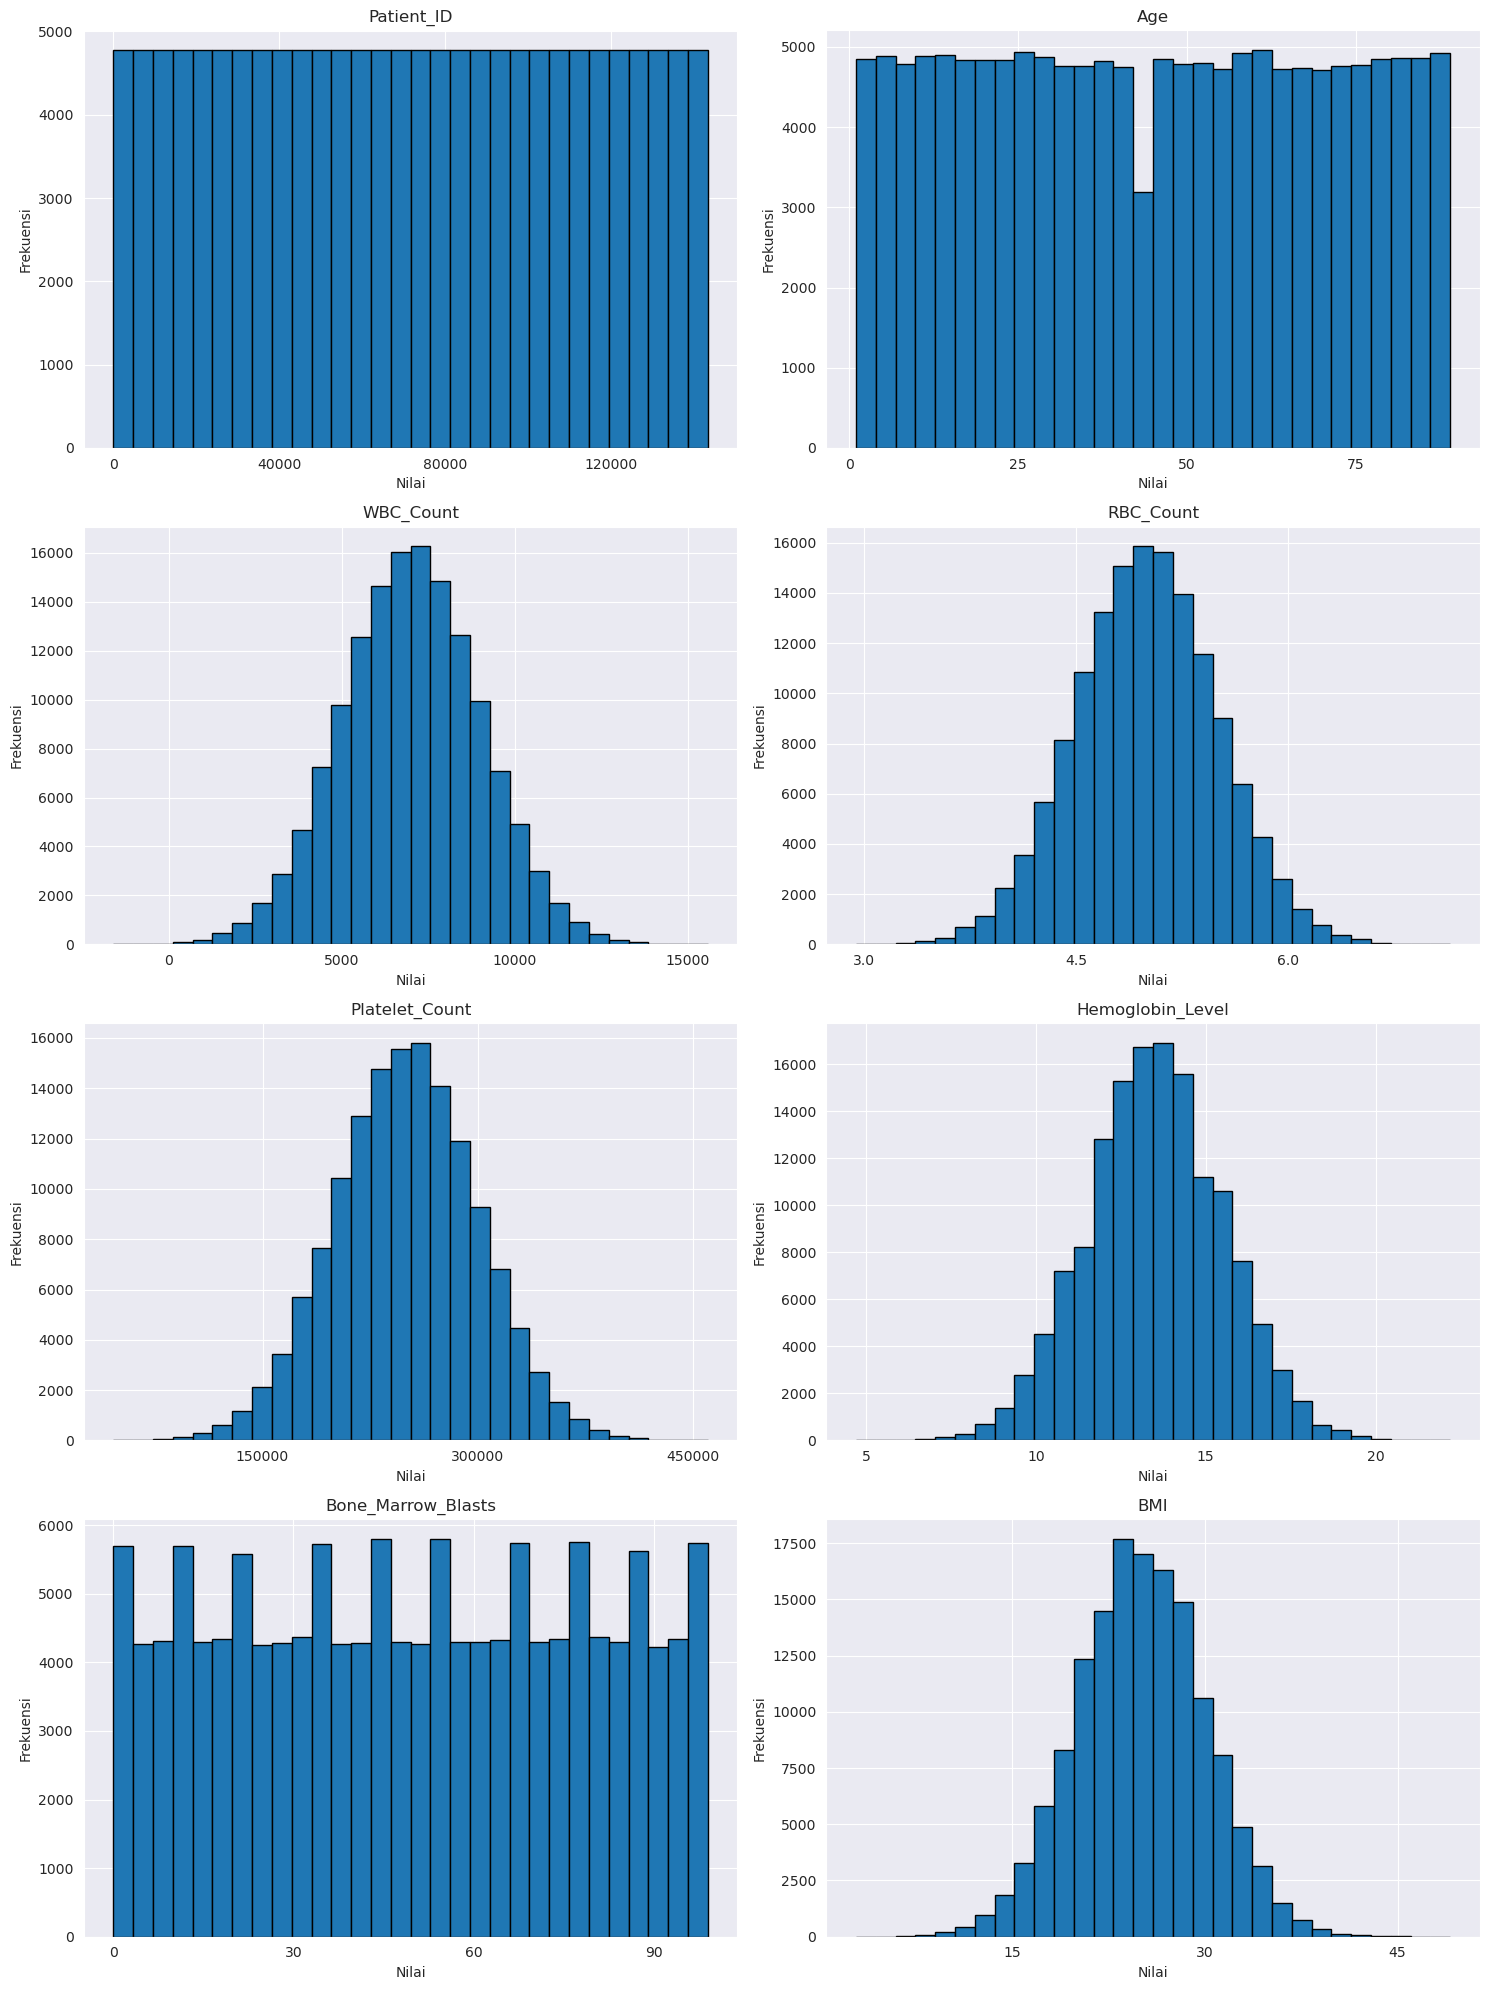

In [124]:
# Menentukan jumlah baris dan kolom plot
n_plots = len(numerical_column)
n_cols = 2  # Jumlah kolom yang diinginkan
n_rows = (n_plots + n_cols - 1) // n_cols  # Menghitung jumlah baris yang dibutuhkan


# Membuat subplot dan flatten axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # <--- PERUBAHAN KRITIS: Flatten universal

# Iterasi dan buat histogram
for i, column in enumerate(numerical_column):
    ax = axes[i]
    ax.hist(df[column], bins=30, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Frekuensi')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))  # Sekarang aman

# Menyembunyikan subplot kosong
for j in range(n_plots, len(axes)):  # <--- Perbaikan range
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 